In [152]:
import numpy as np
import random
import pprint
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

In [2]:
def characterize(i:int):
    if i==0:
        return 'Susceptible'
    elif i==1:
        return 'Infected'
    elif i==2:
        return 'Recovered'
    else:
        return 'Unknown'

In [107]:
def add_infected(state, model, verbose=1):
    n = model['population']
    num_infected = model['initial_infected']
    infected_index = random.sample(list(range(n)), num_infected)
    if verbose>0:
        print('initial infected', infected_index)
    for inf in infected_index:
        state[inf,0]=1
    if verbose>1:
        print(state) # initial with infected 
    return state

def initialize(model, verbose=0):
    n = model['population']
    # initial array (everyone healthy/susceptible)
    initial = np.zeros((n,2))
    if verbose>0:
        print(initial)
    initial = add_infected(initial, model)
    return initial

In [100]:
def get_contacts(model, verbose=0):
    n = model['population']
    contacts = model['contacts']['number']
    type = model['contacts']['type']
    indexes = list(range(n))
    indexes.pop(i)
    contacts_index = random.sample(indexes, contacts)
    if verbose>0:
        print('contacts', contacts_index)
    return contacts_index


In [109]:
def iterate(array, model, verbose=0):
    
    probability_of_infection = model['probability_of_infection']
    
    

    # create an immutable copy of the initial array
    # in order to compare later and increase days in the same condition 
    immutable = array.copy()

    # one iteration
    for i, item in enumerate(array):
        if verbose>0:
            print(i, item, characterize(item[0]))

        # get [contacts] random persons after removing self
        contacts_index = get_contacts(model)

        # process contacts 
        for con in contacts_index:
            if verbose>0:
                print('contact with {} who is {}'.format(con, characterize(array[con][0])))
            state_per = item[0]
            state_con = array[con][0]

            new_state_per = state_per
            new_state_con = state_con
            if state_per==1 and state_con==0:
                if proba_threshold(probability_of_infection):
                    #TODO: add possibility
                    new_state_con=1
            if state_per==0 and state_con==1:
                if proba_threshold(probability_of_infection):
                    #TODO: add possibility
                    new_state_per=1

            array[i][0] = new_state_per
            array[con][0] = new_state_con
            if verbose>1:
                print(array)

    # compare each item with immutable copy
    # if change of state set iteration counter back to zero
    # else raise by one
    for i, item in enumerate(array):
        # print(i, item[0], immutable[i][0])
        if item[0] == immutable[i][0]:
            array[i][1] += 1
        else:
            array[i][1] = 0
    if verbose>1:
        print(array)
    result ={
        'state' : array,
        'count' : {
            'before': count(immutable),
            'after': count(array)
        }
    }
    return result


In [110]:
def count(curr_array):
    '''counts of final state''' 
    cnt_susceptible = 0
    cnt_infected = 0
    cnt_recovered = 0
    for i, item in enumerate(curr_array):
        if item[0]==0:
            cnt_susceptible+=1
        if item[0]==1:
            cnt_infected+=1
    return (cnt_susceptible, cnt_infected, cnt_recovered)

In [119]:
def plot1(state, verbose=0):
    cmap = mpl.cm.get_cmap('brg') # colormap used
    x=list(range(len(state)))
    x = list(map(lambda i: i%10, x)) 
    y=list(range(int(len(state)/10)))*10
    x.sort()
    if verbose>0:
        print(x)
        print(y)

    plt.scatter(x,y, c=state[:,0], cmap=cmap)
    plt.show()

In [189]:
def plot2(state):
    test = state[:,0]
    arr = np.reshape(test,(10,40)).T
    # current['state'].shape
    x = np.arange(0, 11)
    y = np.arange(0, 41)
    plt.figure(figsize=(6, 6))
    plt.pcolormesh(x, y, arr)
    plt.colorbar()
    plt.show()

initial infected [283, 56]


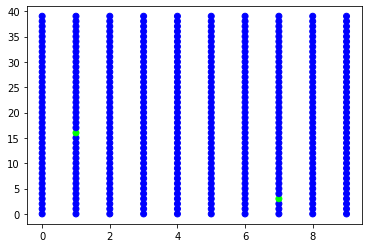

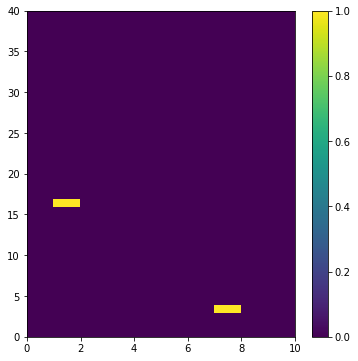

{'after': (370, 30, 0), 'before': (398, 2, 0)}


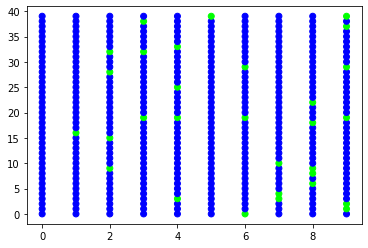

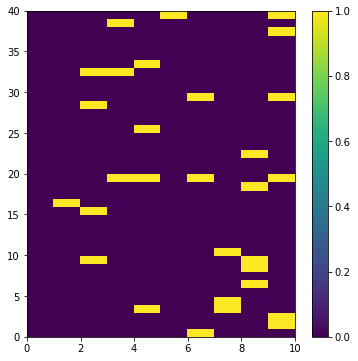

{'after': (171, 229, 0), 'before': (370, 30, 0)}


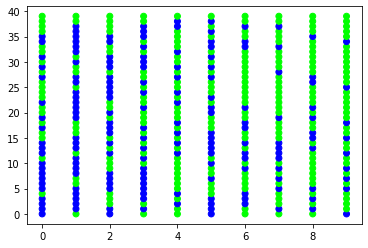

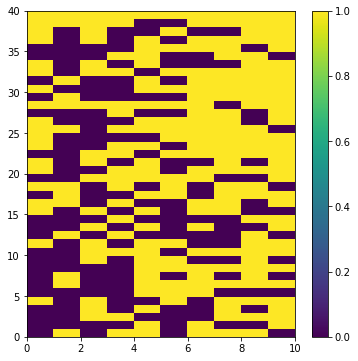

In [193]:
# population
n=400

# no of random contacts in one iteration
contacts=3

#probability of a contact to become infection
inf_prob = 0.5

# initial infected population
infected=2 #no

model = {
    'population': n,
    'contacts': {
        'number': contacts,
        'type': 'random'
    },
    'initial_infected': infected,
    'probability_of_infection': inf_prob
}

initial = initialize(model)

current = {'state':initial}
plot1(current['state'])
plot2(current['state'])

iterations = 2
for i in range(iterations):
    current = iterate(current['state'], model, verbose=0)
    pprint.pprint(current['count'])
    plot1(current['state'])
    plot2(current['state'])

    